In [1]:
from math import sqrt
from numpy import zeros, array, linspace
from matplotlib.pyplot import plot, xlabel, ylabel
%matplotlib inline

def nucleationmodel(kP = 100.0, kN = 10.0, kC = 0.1, kA = 10.0, kPA = 10.0, kT = 0.1):
    noPoints = 20000
    WAMax = 1.0
    dt = 1e-3
    EArr = zeros(noPoints)
    WAArr = zeros(noPoints)
    PAArr = zeros(noPoints)
    timeArr = zeros(noPoints)
    EArr[0] = 0.1
    
    for i in range(noPoints - 1):
        E = EArr[i]
        WA = WAArr[i]
        PA = PAArr[i]
        dEdt = kN * E * WA**2 - kC * E
        dWAdt = (kA + kT * PA / WAMax) * (WAMax - WA) - kN * E * WA**2 - kP * E * WA
        dPAdt = (kPA - kT * PA / WAMax) * (WAMax - WA) - kP * E * PA
        EArr[i + 1] = EArr[i] + dEdt * dt
        WAArr[i + 1] = WAArr[i] + dWAdt * dt
        PAArr[i + 1] = PAArr[i] + dPAdt * dt
        timeArr[i + 1] = timeArr[i] + dt
        
    #Plot.
    #plot(timeArr, EArr)
    #print(str(EArr[-1]))
        
    # Figure out steady-state quantities.
    WAEq = sqrt(kC / kN)
    PAEq = sqrt((kT / WAMax + kA / WAEq)**2 + 4 * kT * kPA / WAMax / WAEq) - (kT / WAMax + kA / WAEq)
    PAEq = PAEq / (2 * kT / WAMax / WAEq)
    EEq = (kA + kT * PAEq / WAMax) * (WAMax - WAEq) / kP / WAEq
    return EEq, PAEq, WAEq

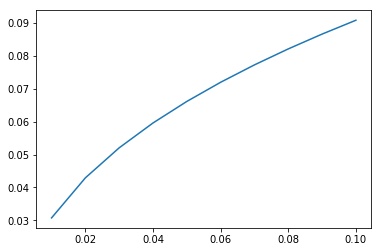

In [2]:
noPoints = 10
capRateArr = linspace(0.01, 0.1, noPoints)
nucleationRateArr = zeros(noPoints)

for i in range(noPoints):
    EEq, PAEq, WAEq = nucleationmodel(100.0, 10.0, capRateArr[i], 10.0, 10.0, 1.0)
    nucleationRateArr[i] = 10.0 * EEq * WAEq**2
    
plot(capRateArr, nucleationRateArr)